# Activity: Address missing data

## Introduction

The datasets that data professionals use to solve problems typically contain missing values, which must be dealt with in order to achieve clean, useful data. This is particularly crucial in exploratory data analysis (EDA). In this activity, I will learn and showcase how to address missing data.

I am a financial data consultant, and an investor has tasked my team with identifying new business opportunities. To help them decide which future companies to invest in, I will provide a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns." My client will use this information to learn about profitable businesses in general.

The investor has requested to provide them with the following data:
- Companies in the `hardware` industry based in either `Beijing`, `San Francisco`, or `London`
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries with companies that joined the list after 2020
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a separate map for Europe is also required)

The dataset includes a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent.

## **Step 1: Imports**

### Import libraries

Import the following relevant Python libraries that will be used for this project:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `plotly.express`
* `seaborn`



In [1]:
# Import libraries and modules.
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

### Load the dataset


In [2]:
# RUN THIS CELL TO IMPORT THE DATA.

df_companies = pd.read_csv("Data/Unicorn_Companies.csv")

## **Step 2: Data exploration**

### Display top rows

Display the first 10 rows of the data to understand how the dataset is structured.

In [3]:
# Display the first 10 rows of the data.

df_companies.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### Statistical properties of the dataset

Use methods and attributes of the dataframe to get information and descriptive statistics for the data, including its range, data types, mean values, and shape.


In [4]:
# Get the shape of the dataset.

df_companies.shape

(1074, 10)

- There are 1074 rows of data, and 10 columns

In [5]:
# Get the data types and number of non-null values in the dataset.

df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


**Question: What are the data types of various columns?**


- All are object data types except for `Year Founded`

**Question: How many columns contain null values?**

- Two columns contain null values which are the city column and select investors column

In [6]:
# Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.

df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


**Question: In what year was the oldest company founded?**

- The oldest company was founded in the year 1919

### Data Preprocessing

In order to answer the investor's questions, some data preprocessing steps are required. The first step is to add a new column to the dataframe containing just the year each company became a unicorn company. This new column will be called `Year Joined`.

In [7]:
# Create a new column "Year Joined" from "Date Joined".
df_companies['Year Joined'] = pd.to_datetime(df_companies['Date Joined']).dt.year

df_companies

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011
...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021


For each country, calculate the sum of all valuations of companies from that country. However, in order to do this, the data will need to be prepared. Currently, the data in the `Valuation` column is a string that starts with a `$` and ends with a `B`. Because this column is not in a numeric datatype, pandas cannot perform mathematical operations on its values. The data in this column needs to be converted to a numeric datatype.

In this step, define a function called `str_to_num()` that accepts as an argument:

* `x`: a string in the format of the values contained in the `Valuation` column

And returns:

* `x`: an `int` of the number represented by the input string

To do this, I'll use the string [`strip()`](https://docs.python.org/3/library/stdtypes.html#str.strip) method for strings. Its argument is a string that contains all the characters needed to be removed from the beginning and end of a given string&mdash;in any order.

In [8]:
# Define the `str_to_num()` function

def str_to_num (x):
    x = x.strip('$B')
    x = int(x)

    return x

str_to_num('$5B')

5

Now, the function will be used to create a new column called `valuation_num` that represents the `Valuation` column as an integer value. To do this, I'll use the series method [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) to apply the `str_to_num()` function to the `Valuation` column.

`apply()` is a method that can be used on a `DataFrame` or `Series` object. The method accepts a function as an argument and applies that function to each value in the series.

In [9]:
# Apply the `str_to_num()` function to the `Valuation` column
# and assign the result back to a new column called `valuation_num`

df_companies['Valuation_num'] = df_companies['Valuation'].apply(str_to_num)

df_companies

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_num
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46
...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017,1
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017,1
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021,1
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021,1


### Find missing values

In [10]:
# Find the number of missing values in each column in this dataset.

df_companies.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
Valuation_num        0
dtype: int64

- The unicorn companies dataset is fairly clean, with a few missing values.
- A single missing value in `Selected Investors` column and 16 missing values in `City` column

Before dealing with missing values, it's important to understand the nature of the missing value that is being filled. To do this, I'll need to perform the following three steps:

1. Apply the `isna()` method to the `df_companies` dataframe as you did in the last step. Remember, this results in a dataframe of the same shape as `df_companies` where each value is `True` if its contents are `NaN` and a `False` if its contents are not `NaN`. Assign the results to a variable called `mask`.

In [11]:
# 1. Apply the `isna()` method to the `df_companies` dataframe and assign back to `mask`

mask = df_companies.isna()

mask.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_num
1069,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,False,False,False


Now, need to go from this dataframe of Boolean values to a dataframe of just the rows of `df_companies` that contain at least one `NaN` value. This means that I need a way to find the indices of the rows of the Boolean dataframe that contain at least one `True` value, then extract those indices from `df_companies`.

Using the [`any()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html) method for `DataFrame` objects, this is possible. This method returns a Boolean `Series` indicating whether any value is `True` over a specified axis.

Note that `0`, `False`, and `NaN` are considered `False` and anything else is considered `True`.

2. Apply the `any()` method to the Boolean dataframe to make a Boolean series where each element in the series represents `True` if a row of the dataframe contains any `True` values and `False` if any row in the dataframe contains any `False` values. Assign the results back to `mask`.

In [12]:
# 2. Apply the `any()` method to `mask` and assign the results back to `mask`

mask = mask.any(axis=1)
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

3. Because `mask` is now a series of Boolean values, it can be used as a Boolean mask.

In [13]:
# 3. Apply `mask` as a Boolean mask to `df_companies` and assign results to `df_missing_rows`

df_missing_rows = df_companies[mask]

df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_num
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


- **Same output: df_companies[df_companies.isna().any(axis=1)]**

In [14]:
df_missing_rows['Country'].value_counts()

Singapore    12
Hong Kong     3
Bahamas       1
China         1
Name: Country, dtype: int64

**Question: Is there a specific country/region that shows up a lot in this missing values dataframe? Which one?**


- 12 out of the 17 countries belong to Singapore
- 3 belong to Hong Kong
- Remaining 2 belong to Bahamas and China

**Steps taken to find missing data:**


- `DataFrame.isna()` will return a Boolean dataframe indicating every location that is `NaN` with `True`
- `sum()` in conjunction with `isna()` to get the counts of `NaN` values in each column
- `any()` in conjunction with `isna()` to create a Boolean mask, which can be applied to the original dataframe to obtain just the rows with at least one `NaN` value

**Question: What observations can be made about the forms and context of missing data?**


- When it comes to missing data, it's important not to assume right away that the data is actually missing, it's very context dependent. For example, the `City` column is all NaN except for one. Why could that be? Maybe the missing unicorn company doesn't have a central location. Some businesses are run fully digitally.

**Question: What other methods could you use to address missing data?**


- Having an individual with domain knowledge observe the missing data
- Contact these unicorn companies directly and inquire on any missing information
- Examine the data source and find out who it came from to obtain more information

## Step 3: Model building

### Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and imputing other values in their place. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

Here, I will try both.

To compare the effect of different actions, first store the original number of values in a variable. I'll create a variable called `count_total` that is an integer representing the total number of values in `df_companies`. For example, if the dataframe had 5 rows and 2 columns, then this number would be 10.

In [15]:
# Store the total number of values in a variable called `count_total`

count_total = df_companies.size
count_total

12888

Now, remove all rows containing missing values and store the total number of remaining values in a variable called `count_dropna_rows`.

In [16]:
# Drop the rows containing missing values, determine number of remaining values

count_dropna_rows = df_companies.dropna().size
count_dropna_rows

12684

Now, remove all columns containing missing values and store the total number of cells in a variable called `count_dropna_columns`.

In [17]:
# Drop the columns containing missing values, determine number of remaining values

count_dropna_columns = df_companies.dropna(axis=1).size
count_dropna_columns

10740

Next, print the percentage of values removed by each method and compare them.

In [18]:
# Print the percentage of values removed by dropping rows.

row_perc = ((count_total-count_dropna_rows)/count_total) * 100
print (f'Percent of rows removed: {row_perc:.2f}')

# Print the percentage of values removed by dropping columns.

col_perc = ((count_total-count_dropna_columns)/count_total) * 100
print (f'Percent of columns removed: {col_perc:.2f}')

Percent of rows removed: 1.58
Percent of columns removed: 16.67


**Question: Which method was most effective? Why?**


- In this case, removing rows seems to be the most effective method. Reason being, the least amount of data is being removed and only the rows where there are missing values are being removed, rather than entire columns. Depending on the purpose of the analysis, removing columns may be the better approach.

Now, practice the second method: imputation. Perform the following steps:

1. Use the [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) dataframe method to fill each missing value with the next non-NaN value in its column. Assign the results to a new dataframe called `df_companies_backfill`.

If there is a `NaN` value in the last row, it will not backfill because there is no subsequent value in the column to refer to.

2. Show the rows that previously had missing values.

In [19]:
# 1. Fill missing values using the 'fillna()' method, back-filling

df_companies_backfill = df_companies.fillna(method='backfill')

# 2. Show the rows that previously had missing values

df_companies_backfill.iloc[df_missing_rows.index, :]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_num
12,FTX,$32B,2021-07-20,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: Do the values that were used to fill in for the missing values make sense?**


- No, the cities, countries, and continents don't correspond with one another.

Another option is to fill the values with a certain value, such as 'Unknown'. However, doing so doesn’t add any value to the dataset and could make finding the missing values difficult in the future. Reviewing the missing values in this dataset determines that it is fine to leave the values as they are. This also avoids adding bias to the dataset.

## Step 4: Results and evaluation

Now that I've addressed the missing values, I'll provide the investors with their requested data points.

### Companies in the `Hardware` Industry

The investor is interested in identifying unicorn companies in the `Hardware` industry in the following cities: `Beijing`, `San Francisco`, and `London`. They are also interested in companies in the `Artificial intelligence` industry in `London`.

1. Create a mask to apply to the `df_companies` dataframe. The following logic is a pseudo-code representation of how this mask could be structured.

2. Apply the mask to the `df_companies` dataframe and assign the result to a new variable called `df_invest`.

In [20]:
# 1. Create a Boolean mask using conditional logic

mask = (
    (df_companies['Industry']=='Hardware') & (df_companies['City'].isin(['Beijing', 'San Franciso', 'London']))
) | (
    (df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London')
)
# 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`

df_invest = df_companies[mask]
df_invest

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_num
36,Bitmain,$12B,2018-07-06,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,2016-12-22,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,2021-12-16,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
873,BenevolentAI,$1B,2015-06-02,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1
923,Geek+,$1B,2018-11-21,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,2018-10-25,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1
1046,Tractable,$1B,2021-06-16,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1


In [21]:
df_invest['Industry'].value_counts()

Hardware                   5
Artificial intelligence    2
Name: Industry, dtype: int64

**Question: How many companies meet the criteria given by the investor?**


- There are 5 hardware companies and 2 artificial intelligence companies

### List of countries by sum of valuation

For each country, sum the valuations of all companies in that country, then sort the results in descending order by summed valuation. Assign the results to a variable called `national_valuations`.

In [22]:
# Group the data by`Country/Region`

national_valuations = (df_companies
                       .groupby(['Country'])['Valuation_num']
                       .sum()
                       .sort_values(ascending=False)
                       .reset_index()
                      )
# Print the top 15 values of the DataFrame.

national_valuations.head(15)

,Country,Valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


**Question: Which countries have the highest sum of valuation?**

- The top 4 companies with the highest valuation are United States, China, India, and United Kingdom, respectively

### Filter out top 4 outlying countries

Use this grouped and summed data to plot a barplot. However, to meet the needs of the stakeholder, I must first remove the United States, China, India, and the United Kingdom. Remove these countries from `national_valuations` and reassign the results to a variable called `national_valuations_no_big4`.

In [23]:
# Remove outlying countries

national_valuations_no_big4 = national_valuations[4:]

national_valuations_no_big4

,Country,Valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41
10,Israel,39
11,Brazil,37
12,Bahamas,32
13,Indonesia,28


Alternative approach

It's also possible to use `isin()` to create a Boolean mask to filter out specific values of the `Country` column. In this case, this process is longer and more complicated than simply using the iloc[] statement. However, there will be situations where this is the most direct approach.

In [24]:
# (Optional) Use `isin()` to create a Boolean mask to accomplish the same task

mask = ~national_valuations['Country'].isin(['United States', 'China', 'India', 'United Kingdom'])

national_valuations[mask]

,Country,Valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41
10,Israel,39
11,Brazil,37
12,Bahamas,32
13,Indonesia,28


### Create barplot for top 20 non-big-4 countries

Now, the data is ready to reveal the top 20 non-big-4 countries with the highest total company valuations. I will use seaborn's [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function to create a plot showing national valuation on one axis and country on the other.

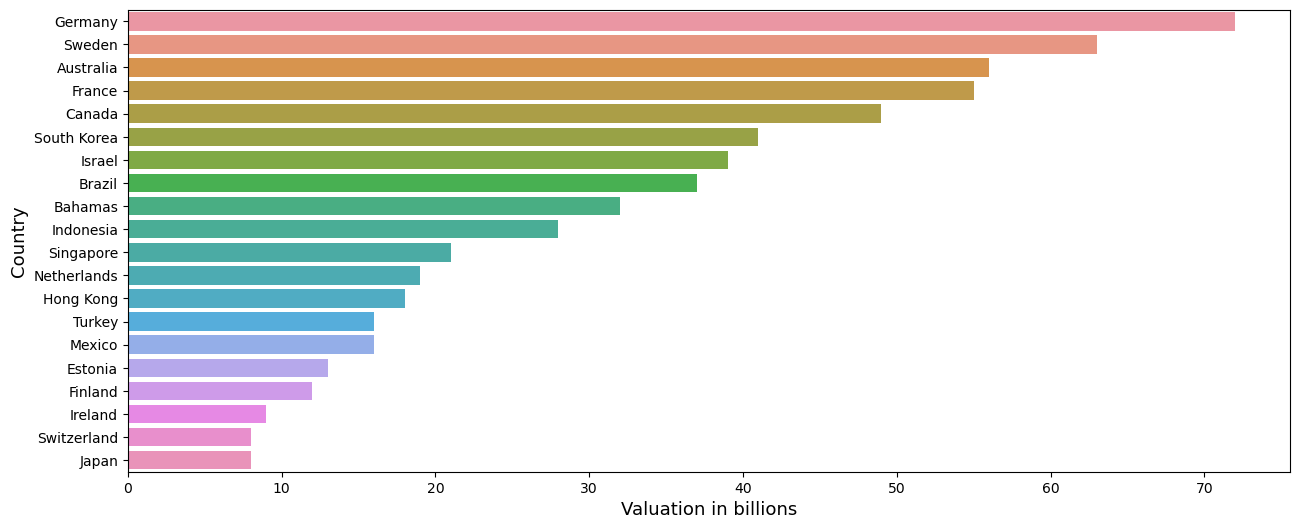

In [25]:
# Create a barplot to compare the top 20 countries with highest company valuations.

plt.figure(figsize=(15,6))
sns.barplot(data = national_valuations_no_big4.head(20),
            x = 'Valuation_num',
            y = 'Country'
           )
plt.ylabel('Country',fontsize=13)
plt.xlabel('Valuation in billions', fontsize=13)

# Show the plot.

plt.show()

### Plot maps

The investor has also asked for a global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a.k.a. "big-four countries").

To do this, I'll need to a create a `scatter_geo()` plot that depicts the total valuations of each non-big-four country on a world map, where each valuation is shown as a circle on the map, and the size of the circle is proportional to that country's summed valuation.

In [26]:
# Plot the sum of valuations per country.

scatter_plot = px.scatter_geo(national_valuations_no_big4,
                              locations = 'Country',
                              size = 'Valuation_num',
                              locationmode = 'country names',
                              color = 'Country',
                              title = 'Valuation size by country'
                             )

scatter_plot.show()

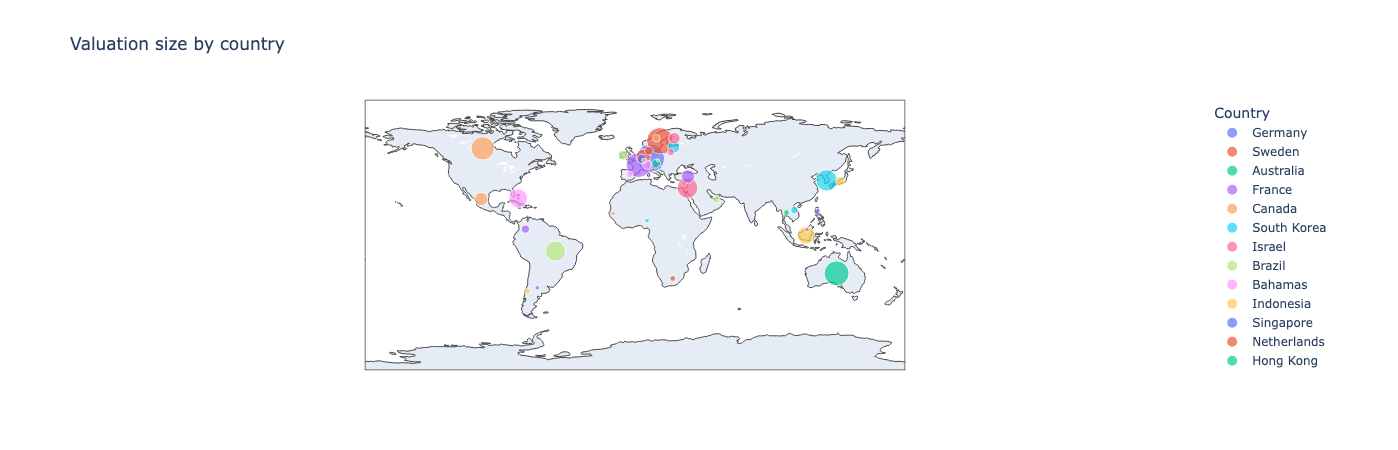

In [27]:
from IPython import display
display.Image('/Users/gzuz/Documents/GitHub/Data-Science-and-Analytics-Repository/Data Cleaning/Data/Valuation by size scatter plot.png')


**Question: How is the valuation sum per country visualized in the plot?**


- The size of the circle indicates the valuation amount. The larger the circle the higher the valuation.

**Question: Does any region stand out as having a lot of activity?**


- Many of the unicorn companies are concentrated in Europe.

## Conclusion

**What are some key takeaways I learned during this project?**

- It's important to treat missing data carefully depending on the situation and objective of the analysis.
- In some cases, it's wiser to leave missing data as it is.
- Addressing missing data can either involve filling them in, or removing them. However, it's important to leave out any bias and ensure that.
- Not every method of filling data is appropriate, it's very situation dependent.
- Addressing missing data is a very important part of the EDA process, specifically data-cleansing.

**How would I present my findings to others?**

- If I were to identify industry-specific companies in certain locations, I'd provide a shortlist of the company names along with their locations. 
- Regarding the top 20 countries by sum of valuations, I could refer to the plot I created earlier in the lab or share a compiled list. 
- If I need to focus on the top countries sorted by sum of company valuations, I'd present data excluding the United States, China, India, and the United Kingdom, as instructed.
- For any inquiries relating to the valuation map, I would not only show the visuals but also offer a concise summary of the key data points.

**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

